In [ ]:
## Task 1 A

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


C:\Users\aveli\anaconda3\envs\cop501CW\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 153s 505ms/step - accuracy: 0.1685 - loss: 8.3173 - val_accuracy: 0.2983 - val_loss: 3.5652
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 147s 498ms/step - accuracy: 0.3141 - loss: 3.1502 - val_accuracy: 0.3679 - val_loss: 2.4037
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 146s 494ms/step - accuracy: 0.3912 - loss: 2.2746 - val_accuracy: 0.3636 - val_loss: 2.1525
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 147s 497ms/step - accuracy: 0.4173 - loss: 1.9997 - val_accuracy: 0.4566 - val_loss: 1.8745
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 202s 495ms/step - accuracy: 0.4435 - loss: 1.8520 - val_accuracy: 0.4543 - val_loss: 1.8212
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 146s 494ms/step - accuracy: 0.4594 - loss: 1.7563 - val_accuracy: 0.4874 - val_loss: 1.7263
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 151s 512ms/step - accuracy: 0.4595 - loss: 1.7280 - val_accuracy: 0.4930 - val_loss: 1.6715
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 199s 500ms/step - accuracy: 0.4903 -

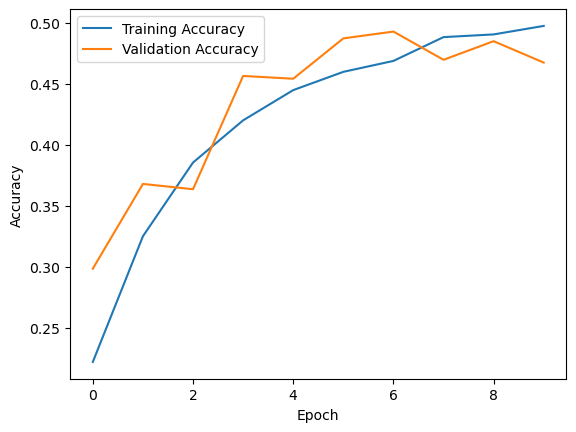

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

# Define paths to your dataset
train_dir = r'C:\Users\aveli\OneDrive - Loughborough University\coursework_task01_imageset\imageset\train'
validation_dir = r'C:\Users\aveli\OneDrive - Loughborough University\coursework_task01_imageset\imageset\val'

# Use ImageDataGenerator to load and preprocess images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Define the model
model = models.Sequential()
model.add(layers.Input(shape=(64, 64, 3)))  # Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot labels
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,  # Training data generator
    epochs=10,
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Task 1 B

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


C:\Users\aveli\anaconda3\envs\cop501CW\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 272s 899ms/step - accuracy: 0.2013 - loss: 9.5239 - val_accuracy: 0.1315 - val_loss: 8.9901 - learning_rate: 1.0000e-04
Epoch 2/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 134s 451ms/step - accuracy: 0.2952 - loss: 8.0652 - val_accuracy: 0.4112 - val_loss: 7.2212 - learning_rate: 1.0000e-04
Epoch 3/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 126s 397ms/step - accuracy: 0.3323 - loss: 7.2275 - val_accuracy: 0.3717 - val_loss: 6.6767 - learning_rate: 1.0000e-04
Epoch 4/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 113s 380ms/step - accuracy: 0.3593 - loss: 6.4794 - val_accuracy: 0.4015 - val_loss: 5.9342 - learning_rate: 1.0000e-04
Epoch 5/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 137s 462ms/step - accuracy: 0.3882 - loss: 5.7920 - val_accuracy: 0.4061 - val_loss: 5.3497 - learning_rate: 1.0000e-04
Epoch 6/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 234s 791ms/step - accuracy: 0.4028 - loss: 5.1847 - val_accuracy: 0.4375 - val_loss: 4.7959 - learning_rate: 1.0000e-04
Epoch 7/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 

296/296 ━━━━━━━━━━━━━━━━━━━━ 201s 593ms/step - accuracy: 0.6369 - loss: 1.2404 - val_accuracy: 0.6155 - val_loss: 1.2945 - learning_rate: 1.0000e-06
Epoch 44/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 177s 600ms/step - accuracy: 0.6376 - loss: 1.2412 - val_accuracy: 0.6155 - val_loss: 1.2910 - learning_rate: 1.0000e-06
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - accuracy: 0.6102 - loss: 1.3061
Validation Accuracy: 0.6188535094261169


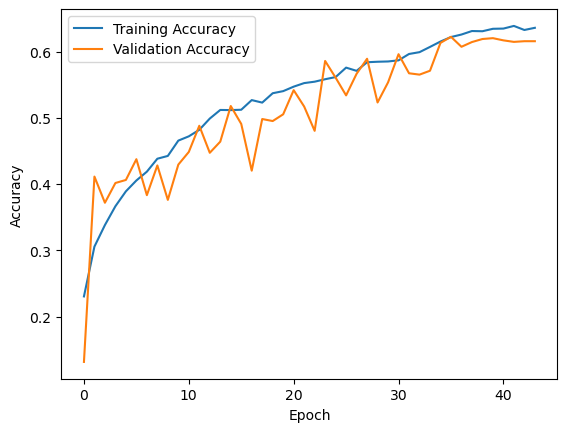

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from sklearn.utils.class_weight import compute_class_weight

# Define paths to your dataset
train_dir = r'C:\Users\aveli\OneDrive - Loughborough University\coursework_task01_imageset\imageset\train'
validation_dir = r'C:\Users\aveli\OneDrive - Loughborough University\coursework_task01_imageset\imageset\val'

# Use ImageDataGenerator to load and preprocess images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Define the model
model = models.Sequential()
model.add(layers.Input(shape=(64, 64, 3)))  # Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Additional layer
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))  # Additional layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot labels
    metrics=['accuracy']
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reduce learning rate by a factor of 10
    patience=3,  # Wait for 3 epochs with no improvement
    min_lr=1e-6  # Minimum learning rate
)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Wait for 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # Increase epochs
    validation_data=validation_generator,
    callbacks=[lr_scheduler, early_stopping],  # Add callbacks
    class_weight=class_weights_dict  # Add class weights
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()